# Simple stochastic SBML model
Create a simple stochastic model with tellurium and export the SBML for COPASI.

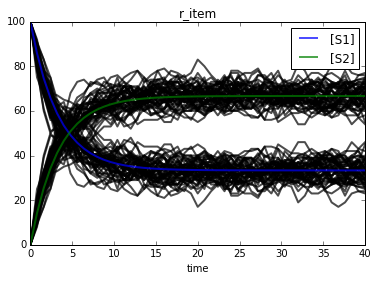

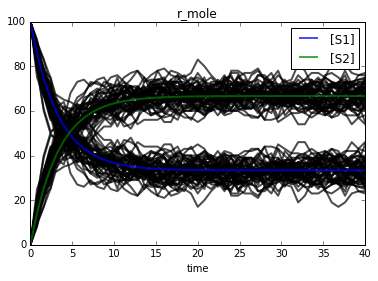

In [1]:
%matplotlib inline
from __future__ import print_function
import tellurium as te
import numpy as np

r_item = te.loada("""
model stochastic_item()
    unit substance = 1 item;

    J1_f : S1 => S2; kf*S1; 
    J1_b : S2 => S1; kb*S2; 
    kf = 0.2; kb = 0.1;
    S1 = 100; S2 = 0;
end
""")

r_mole = te.loada("""
model stochastic_mole()
    unit substance = 1 mole;

    J1_f : S1 => S2; kf*S1; 
    J1_b : S2 => S1; kb*S2; 
    kf = 0.2; kb = 0.1;
    S1 = 100; S2 = 0;
end
""")

for name in ['r_item', 'r_mole']:
    r = globals()[name]
    # run some stochastic simulations with the model
    r.setIntegrator('gillespie')
    r.setSeed(1234)
    results = []
    for k in range(1, 50):
        r.reset()
        s = r.simulate(0, 40)
        results.append(s)
        r.plot(s, show=False, loc=None, color='black', alpha=0.7)

    # run the determenistic version
    r.setIntegrator('cvode')
    r.reset()
    s = r.simulate(0, 40)
    r.plot(s, show=True, alpha=0.7, title=name)

    # save SBML
    r.exportToSBML("{}.xml".format(name), current=False)